Final goal: 11021
As of 2017-05-13: 
2017-05-17 5014.46428573
2017-06-23 8045.8214286
2017-07-30 11077.1785715


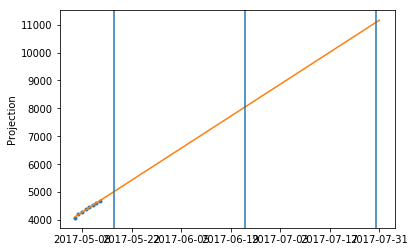

In [5]:
import math
from datetime import datetime, date

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np


def get_num_date_for_value(pol, dest):
    return int(math.ceil(max(np.roots(pol - dest))))


def print_dest(pol, dest):
    num_dest_date = get_num_date_for_value(pol, dest)
    dest_date = mdates.num2date(num_dest_date).date()
    print(dest_date, pol(num_dest_date))
    
    plt.axvline(x=dest_date)


def parse_date(d):
    return datetime.strptime(d, '%Y/%m/%d')


def main():
    progress_journal = [
        ['2017/5/6', 4075],
        ['2017/5/7', 4199],
        ['2017/5/8', 4294],
        ['2017/5/9', 4383],
        ['2017/5/10', 4460],
        ['2017/5/11', 4533],
        ['2017/5/12', 4592],
        ['2017/5/13', 4664],
    ]

    dates = [parse_date(row[0]) for row in progress_journal]
    x = mdates.date2num(dates)
    y = [row[1] for row in progress_journal]

    fn = np.poly1d(np.polyfit(x, y, 1))
    
    plt.plot(mdates.num2date(x), y, '.')
    end_date = date(2017, 7, 31)
    x2 = np.linspace(x.min(), mdates.date2num(end_date), 100)

    plt.plot(mdates.num2date(x2), fn(x2), label='Now')
    plt.ylabel('Projection')

    print("Final goal: 11021")
    print("As of " + str(datetime.now().date()) + ": ")
    print_dest(fn, 5000)
    print_dest(fn, 8000)
    print_dest(fn, 11021)

    plt.show()


# Final goal: 11021
# As of 2017-05-12:
# 2017-05-17 5043.71428572
# 2017-06-21 8024.9642856
# 2017-07-27 11091.3928569

if __name__ == "__main__":
    main()